In [459]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from pyriemann.embedding import Embedding
from pyriemann.classification import MDM
from pyriemann.estimation import Covariances
from alphawaves.dataset import AlphaWaves
import matplotlib.pyplot as plt
import numpy as np
import mne

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [460]:
subject = dataset.subject_list[18]

### The code in the following cell is from the github: https://github.com/plcrodrigues/py.ALPHA.EEG.2017-GIPSA

Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
subject 1
mean accuracy : 0.8


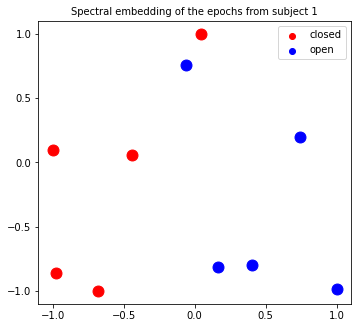

Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
subject 2
mean accuracy : 1.0


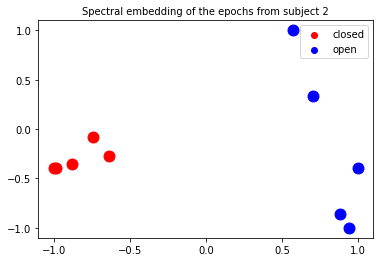

Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
subject 3
mean accuracy : 1.0


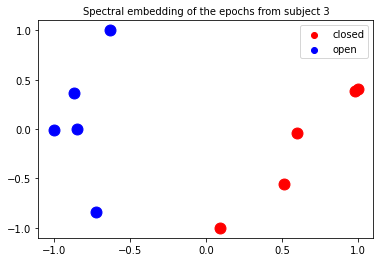

Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
subject 4
mean accuracy : 1.0


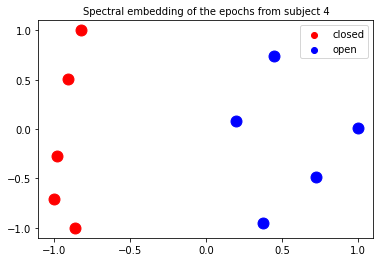

Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
subject 5
mean accuracy : 1.0


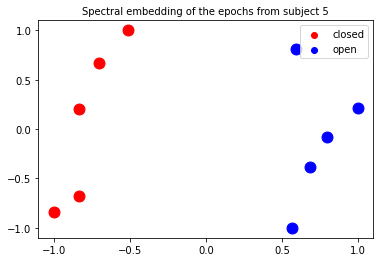

Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
subject 6
mean accuracy : 1.0


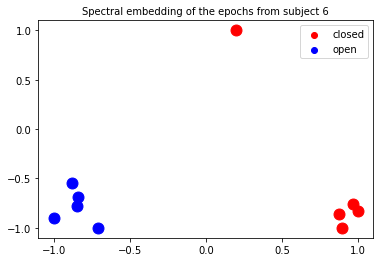

Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
subject 8
mean accuracy : 1.0


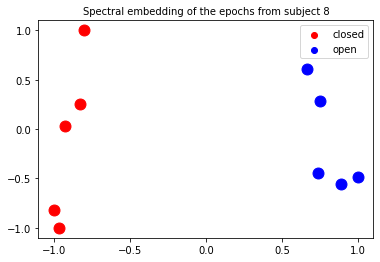

Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
subject 9
mean accuracy : 1.0


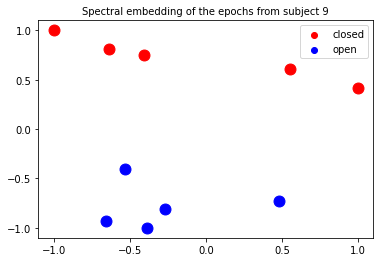

Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
subject 10
mean accuracy : 1.0


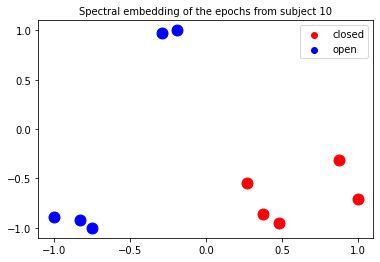

Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
subject 11
mean accuracy : 1.0


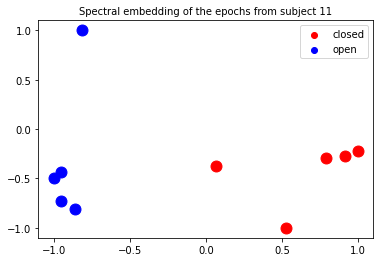

Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
subject 12
mean accuracy : 1.0


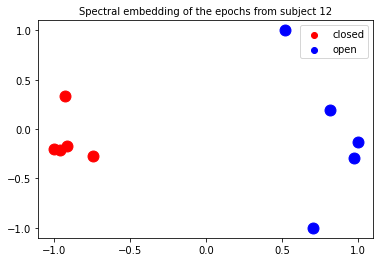

Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
subject 13
mean accuracy : 1.0


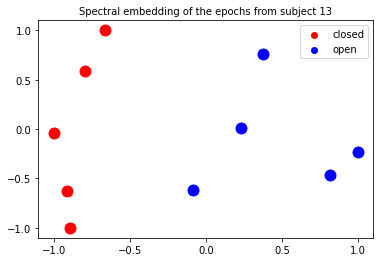

Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
subject 14
mean accuracy : 1.0


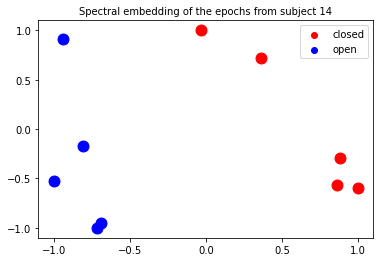

Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
subject 15
mean accuracy : 1.0


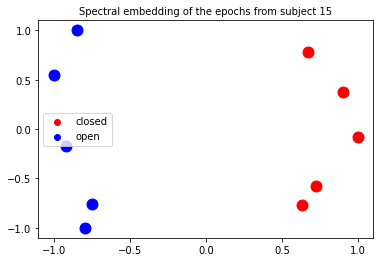

Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
subject 16
mean accuracy : 1.0


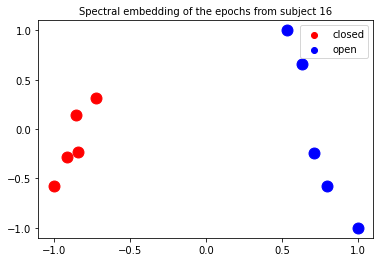

Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
subject 17
mean accuracy : 1.0


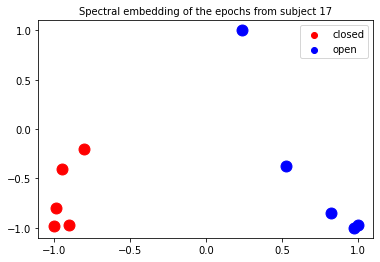

Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
subject 18
mean accuracy : 1.0


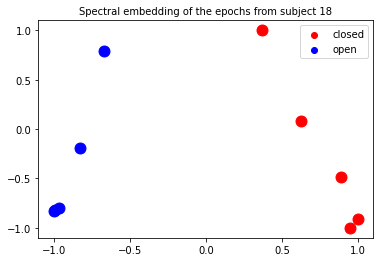

Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
subject 19
mean accuracy : 1.0


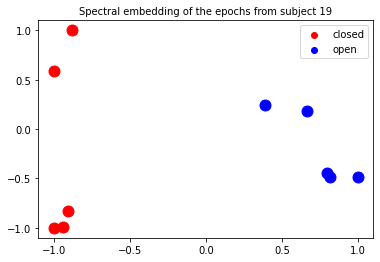

Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
subject 20
mean accuracy : 1.0


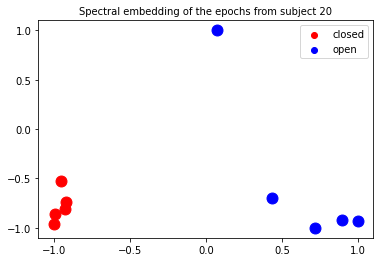

In [619]:

"""
=============================
Classification of the trials
=============================

This example shows how to extract the epochs from the dataset of a given
subject and then classify them using Machine Learning techniques using
Riemannian Geometry. The code also creates a figure with the spectral embedding
of the epochs.

"""
# Authors: Pedro Rodrigues <pedro.rodrigues01@gmail.com>
#
# License: BSD (3-clause)



import warnings
warnings.filterwarnings("ignore")

#scatter plot of the embedded points
fig = plt.figure(facecolor='white', figsize=(5.6, 5.2))
colors = {1: 'r', 2: 'b'}


embi_arr1_avg = []
embi_arr2_avg = []
for i in range(19):

    # define the dataset instance
    dataset = AlphaWaves(useMontagePosition = False) # use useMontagePosition = False with recent mne versions

    # get the data from subject of interest
    subject = dataset.subject_list[i]
    raw = dataset._get_single_subject_data(subject)

    # filter data and resample
    fmin = 3
    fmax = 40
    raw.filter(fmin, fmax, verbose=False)
    raw.resample(sfreq=128, verbose=False)

    # detect the events and cut the signal into epochs
    events = mne.find_events(raw=raw, shortest_event=1, verbose=False)
    event_id = {'closed': 1, 'open': 2}
    epochs = mne.Epochs(raw, events, event_id, tmin=2.0, tmax=8.0, baseline=None,
                        verbose=False, preload=True)
    epochs.pick_types(eeg=True)

    # get trials and labels
    X = epochs.get_data()
    y = events[:, -1]

    # cross validation
    skf = StratifiedKFold(n_splits=5)
    clf = make_pipeline(Covariances(estimator='lwf'), MDM())
    scr = cross_val_score(clf, X, y, cv=skf)

    # print results of classification
    print('subject', subject)
    print('mean accuracy :', scr.mean())

    # get the spectral embedding of the epochs
    C = Covariances(estimator='lwf').fit_transform(X)
    emb = Embedding(metric='riemann').fit_transform(C)

    df = pd.DataFrame(events)
    df[2]

    embi_arr1 = []
    embi_arr2 = []
    for embi, yi in zip(emb, y):
        plt.scatter(embi[0], embi[1], s=120, c=colors[yi])
        embi_arr1.append(embi[0])
        embi_arr2.append(embi[1])
    embi_arr1_avg.append(np.mean(embi_arr1))
    embi_arr2_avg.append(np.mean(embi_arr2))

    labels = {1: 'closed', 2: 'open'}
    for yi in np.unique(y):
        plt.scatter([], [], c=colors[yi], label=labels[yi])
    plt.xticks([-1, -0.5, 0.0, +0.5, 1.0])
    plt.yticks([-1, -0.5, 0.0, +0.5, 1.0])

    plt.title(
        'Spectral embedding of the epochs from subject ' +
        str(subject),
        fontsize=10)
    plt.legend()

    plt.show()


In [462]:
events

array([[ 1048,     0,     1],
       [ 3379,     0,     2],
       [ 5323,     0,     1],
       [ 7158,     0,     2],
       [ 9076,     0,     1],
       [10871,     0,     2],
       [12801,     0,     1],
       [14744,     0,     2],
       [16570,     0,     1],
       [18359,     0,     2]])

In [463]:
events.shape

(10, 3)

In [464]:
y

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

In [465]:
epochs

<Epochs  |   10 events (all good), 2 - 8 sec, baseline off, ~994 kB, data loaded,
 'closed': 5
 'open': 5>

In [466]:
# embi_df = pd.DataFrame(embi_arr1_avg, embi_arr2_avg)
# embi_df = embi_df.reset_index()
# embi_df = embi_df.rename(columns={"index":'embi2',0:'embi1'})
# embi_df

# Fatigue Predictor (RFC)

In [600]:
import warnings
warnings.filterwarnings("ignore")

#scatter plot of the embedded points
fig = plt.figure(facecolor='white', figsize=(5.6, 5.2))
colors = {1: 'r', 2: 'b'}


embi_arr1_avg = []
embi_arr2_avg = []
for i in range(20):

    # define the dataset instance
    dataset = AlphaWaves(useMontagePosition = False) # use useMontagePosition = False with recent mne versions

    # get the data from subject of interest
    subject = dataset.subject_list[0]
    raw = dataset._get_single_subject_data(subject)

    # filter data and resample
    fmin = 3
    fmax = 40
    raw.filter(fmin, fmax, verbose=False)
    raw.resample(sfreq=128, verbose=False)

    # detect the events and cut the signal into epochs
    events = mne.find_events(raw=raw, shortest_event=1, verbose=False)
    event_id = {'closed': 1, 'open': 2}
    epochs = mne.Epochs(raw, events, event_id, tmin=2.0, tmax=8.0, baseline=None,
                        verbose=False, preload=True)
    epochs.pick_types(eeg=True)

    # get trials and labels
    X = epochs.get_data()
    y = events[:, -1]

    # cross validation
    skf = StratifiedKFold(n_splits=5)
    clf = make_pipeline(Covariances(estimator='lwf'), MDM())
    scr = cross_val_score(clf, X, y, cv=skf)

    # print results of classification
#     print('subject', subject)
#     print('mean accuracy :', scr.mean())

    # get the spectral embedding of the epochs
    C = Covariances(estimator='lwf').fit_transform(X)
    emb = Embedding(metric='riemann').fit_transform(C)


    embi_arr1 = []
    embi_arr2 = []
    for embi, yi in zip(emb, y):
#         plt.scatter(embi[0], embi[1], s=120, c=colors[yi])
        embi_arr1.append(embi[0])
        embi_arr2.append(embi[1])
    embi_arr1_avg.append(np.mean(embi_arr1))
    embi_arr2_avg.append(np.mean(embi_arr2))


Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
Setting non-standard conf

<Figure size 403.2x374.4 with 0 Axes>

In [601]:
demo = pd.read_csv('demographic.csv', header = None)
demo = demo.rename(columns={0: "subject_num", 1: "m/f", 2:'age',3:'fatigue'})
demo["embi1"] = embi_arr1_avg
demo["embi2"] = embi_arr2_avg
demo = demo.drop(columns = ['subject_num','m/f','age'])
def helper(x):
    if x>4:
        return 1
    else:
        return 0
demo['fatigue(bi)'] = demo['fatigue'].apply(helper) 

y = np.array(demo['fatigue(bi)'])
demo = demo.drop(columns = ['fatigue','fatigue(bi)'])
demo = demo.T
X = np.array([demo[0],demo[1],demo[2],demo[3],demo[4],demo[5],demo[6],demo[7],demo[8],demo[9],demo[10],demo[11],demo[12],demo[13],demo[14],demo[15],demo[16],demo[17],demo[18],demo[19]])

In [602]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X[:15],y[:15])

RandomForestClassifier(max_depth=2, random_state=0)

In [603]:
X

array([[-0.0797829 , -0.23449711],
       [-0.0797829 , -0.23449711],
       [-0.0797829 , -0.23449711],
       [-0.0797829 , -0.23449711],
       [-0.0797829 , -0.23449711],
       [-0.0797829 , -0.23449711],
       [-0.0797829 , -0.23449711],
       [-0.0797829 , -0.23449711],
       [-0.0797829 , -0.23449711],
       [-0.0797829 , -0.23449711],
       [-0.0797829 , -0.23449711],
       [-0.0797829 , -0.23449711],
       [-0.0797829 , -0.23449711],
       [-0.0797829 , -0.23449711],
       [-0.0797829 , -0.23449711],
       [-0.0797829 , -0.23449711],
       [-0.0797829 , -0.23449711],
       [-0.0797829 , -0.23449711],
       [-0.0797829 , -0.23449711],
       [-0.0797829 , -0.23449711]])

In [604]:
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [614]:
demo2

,subject_num,m/f,age,fatigue,mean_volt,fatigue(bi)
0,1.0,1.0,27.0,5.0,-0.009224,1
1,2.0,1.0,23.0,0.0,0.020633,0
2,3.0,1.0,44.0,2.0,-0.000636,0
3,4.0,1.0,26.0,2.0,-0.038395,0
4,5.0,1.0,26.0,4.0,-0.002443,1
5,6.0,1.0,26.0,7.0,0.001410,1
6,7.0,1.0,25.0,1.0,0.030495,0
7,8.0,1.0,19.0,7.0,-0.023789,1
8,9.0,1.0,19.0,2.0,-0.021822,0
9,10.0,0.0,26.0,0.0,-0.004755,0


In [633]:
skf = StratifiedKFold(n_splits=5)
scr = cross_val_score(clf,X,y, cv=skf)

In [634]:
scr.mean()

1.0

# Fatigue Classifier Attemp 2

In [473]:
import warnings
warnings.filterwarnings("ignore")

#scatter plot of the embedded points
fig = plt.figure(facecolor='white', figsize=(5.6, 5.2))
colors = {1: 'r', 2: 'b'}


embi_arr1_avg = []
embi_arr2_avg = []

X_all = []
for i in range(19):
    print(i)

    # define the dataset instance
    dataset = AlphaWaves(useMontagePosition = False) # use useMontagePosition = False with recent mne versions

    # get the data from subject of interest
    subject = dataset.subject_list[i]
    raw = dataset._get_single_subject_data(subject)

    # filter data and resample
    fmin = 3
    fmax = 40
    raw.filter(fmin, fmax, verbose=False)
    raw.resample(sfreq=128, verbose=False)

    # detect the events and cut the signal into epochs
    events = mne.find_events(raw=raw, shortest_event=1, verbose=False)
    event_id = {'closed': 1, 'open': 2}
    epochs = mne.Epochs(raw, events, event_id, tmin=2.0, tmax=8.0, baseline=None,
                        verbose=False, preload=True)
    epochs.pick_types(eeg=True)

    # get trials and labels
    X = epochs.get_data()
    y = events[:, -1]
    
    X_all.append(X)

    # cross validation
    skf = StratifiedKFold(n_splits=5)
    clf = make_pipeline(Covariances(estimator='lwf'), MDM())
    scr = cross_val_score(clf, X, y, cv=skf)

0
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
1
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
2
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
3
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
4
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
5
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
6
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
7
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
8
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
9
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
10
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
11
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
12
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
13
Setting non-standard config type: "MNE_DATASETS_ALPHAWAVES_PATH"
14
Setting non-standard config type: "MNE_DATASETS_ALPHAWA

<Figure size 403.2x374.4 with 0 Axes>

In [474]:
X_df = pd.DataFrame(X_all[0][0])
X_df
poop = pd.DataFrame()
# for index, row in X_df.iterrows():
#     poop[index] = np.mean(row)
# poop

In [475]:
np.array(X_all).shape

(19, 10, 16, 769)

In [476]:
X_df

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,768
0,5.927691,6.962535,15.145673,13.317981,7.578736,10.576103,9.060214,5.231307,12.789618,18.636905,...,-0.053886,9.773040,12.730637,7.211908,2.565465,3.149865,4.133082,0.686519,-0.739668,0.091681
1,9.260909,4.165609,10.024206,10.138039,3.678383,6.680991,10.301844,9.288544,15.154422,21.346407,...,2.229163,9.122686,11.082614,5.989936,1.155740,1.866116,3.186977,0.972878,1.872654,2.453274
2,25.455936,19.622092,13.240163,13.193289,15.432289,22.869435,16.102889,-13.499459,-18.456703,13.391756,...,6.268215,13.259279,11.099260,4.868008,7.539898,10.019753,0.378148,-6.537121,3.780877,15.694327
3,9.279823,8.033368,16.104943,18.157573,11.198222,14.849047,16.276762,7.973092,13.814237,24.323610,...,8.517902,15.667658,19.075711,11.649566,1.235275,-0.635751,1.981386,0.557870,1.240080,2.062949
4,2.160146,1.406706,7.487800,8.906569,5.576881,7.574746,9.066193,7.140471,11.356984,15.467461,...,9.114438,13.463967,11.531223,6.454747,1.139704,-0.649586,2.384127,4.154773,4.927078,2.564972
5,6.388891,11.182667,10.750318,4.623420,2.799911,10.669572,4.972525,-11.522168,-6.402082,8.768521,...,-0.658974,15.379843,21.894352,6.715206,-2.677162,10.612512,14.365274,-1.822218,-4.821745,-0.639542
6,12.819784,8.480195,15.039424,18.799086,10.452884,11.017445,7.933653,-5.183739,0.763429,13.262746,...,9.719453,15.992571,20.850997,14.580368,1.899693,0.010164,3.915051,1.335194,1.683074,1.667441
7,4.864456,2.494208,7.503304,10.523272,3.956623,4.020834,7.957551,3.622860,4.521564,10.195565,...,3.971622,7.651132,7.789089,5.740010,1.823334,1.666166,5.307321,4.245369,1.742789,0.250180
8,-10.872570,18.131012,44.194434,56.210271,47.547178,28.307469,12.717469,-2.487688,-11.714469,-3.076391,...,-12.862611,1.091595,18.371750,25.353082,21.789761,22.211668,20.542040,2.002898,-8.776138,-1.207291
9,10.145315,9.682760,14.006254,20.242640,14.620917,8.146276,-4.958308,-22.621343,-16.037987,2.176394,...,-7.803357,7.164395,19.847745,17.463867,8.979478,9.849048,11.598471,0.211650,-8.623865,-7.216625


In [477]:
X.shape

(10, 16, 769)

In [478]:
dfx = []
for j in range(19):
    array = []
    for i in range(10):
        array.append(X_all[j][i].mean())
    dfx.append(array)

In [479]:
new_df = pd.DataFrame(dfx)
new_df

,0,1,2,3,4,5,6,7,8,9
0,0.066467,-0.075816,-0.035101,0.045265,0.021882,-0.000505,-0.014215,-0.057541,-0.011583,-0.031095
1,0.013167,-0.060937,0.069295,0.054733,0.102799,0.046573,0.003332,-0.062395,0.002987,0.036774
2,-0.030761,0.077839,0.000500,0.104525,0.001986,-0.041199,0.023517,-0.153920,0.028540,-0.017385
3,-0.005407,-0.008554,-0.056049,0.024576,0.006312,-0.075300,0.026866,0.035753,-0.099599,-0.232547
4,-0.009734,-0.103974,0.016800,0.037435,-0.023935,0.012149,0.003691,0.067855,0.039832,-0.064550
5,-0.014554,-0.005298,-0.011861,-0.011518,0.022200,-0.011534,0.000199,0.025527,-0.013997,0.034935
6,-0.047709,-0.007294,-0.040386,0.266081,0.026860,0.036591,0.080970,0.032405,-0.008024,-0.034546
7,0.000159,-0.054404,-0.063275,0.015720,0.020803,-0.046722,-0.026345,-0.006956,-0.016931,-0.059942
8,-0.071356,-0.031478,-0.010167,-0.079435,-0.019935,-0.066156,0.030481,0.028242,-0.002280,0.003863
9,-0.020392,-0.024929,0.044054,-0.005664,-0.032104,0.004622,0.002394,-0.062055,0.050617,-0.004094


In [480]:
new_df['mean'] = new_df.mean(axis=1)

In [504]:
demo2 = pd.read_csv('demographic.csv', header = None)
demo2 = demo2.rename(columns={0: "subject_num", 1: "m/f", 2:'age',3:'fatigue'})
demo2["mean_volt"] = new_df["mean"]
demo2 = demo2.T.drop(columns = [19]).T


In [506]:
demo2

,subject_num,m/f,age,fatigue,mean_volt
0,1.0,1.0,27.0,5.0,-0.009224
1,2.0,1.0,23.0,0.0,0.020633
2,3.0,1.0,44.0,2.0,-0.000636
3,4.0,1.0,26.0,2.0,-0.038395
4,5.0,1.0,26.0,4.0,-0.002443
5,6.0,1.0,26.0,7.0,0.001410
6,7.0,1.0,25.0,1.0,0.030495
7,8.0,1.0,19.0,7.0,-0.023789
8,9.0,1.0,19.0,2.0,-0.021822
9,10.0,0.0,26.0,0.0,-0.004755


Text(0.5, 1.0, 'Mean Voltage VS Fatigue ')

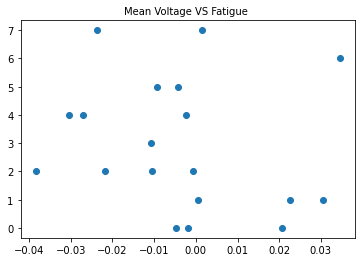

In [622]:
x_val = demo2['mean_volt']
y_val = demo2['fatigue']
gang = plt.scatter(x_val,y_val)
plt.title(
        'Mean Voltage VS Fatigue ',
        fontsize=10)

In [508]:
demo2['mean_volt'].corr(demo2['fatigue'])

-0.18500829581713293

In [509]:
def helper(x):
    if x>3:
        return 1
    else:
        return 0
demo2['fatigue(bi)'] = demo2['fatigue'].apply(helper) 
demo2

,subject_num,m/f,age,fatigue,mean_volt,fatigue(bi)
0,1.0,1.0,27.0,5.0,-0.009224,1
1,2.0,1.0,23.0,0.0,0.020633,0
2,3.0,1.0,44.0,2.0,-0.000636,0
3,4.0,1.0,26.0,2.0,-0.038395,0
4,5.0,1.0,26.0,4.0,-0.002443,1
5,6.0,1.0,26.0,7.0,0.001410,1
6,7.0,1.0,25.0,1.0,0.030495,0
7,8.0,1.0,19.0,7.0,-0.023789,1
8,9.0,1.0,19.0,2.0,-0.021822,0
9,10.0,0.0,26.0,0.0,-0.004755,0


In [534]:
clf2 = RandomForestClassifier(max_depth=2, random_state=0)
r = np.array(demo2['mean_volt']).reshape(-1, 1)
n = demo2['fatigue(bi)']
clf2.fit(r[:15],n[:15])

RandomForestClassifier(max_depth=2, random_state=0)

In [539]:
print(clf2.predict(r[15:]))

[1 0 0 0]


In [540]:
clf3 = RandomForestClassifier(max_depth=2, random_state=0)
features_x2 = np.vstack((demo2['mean_volt'], demo2['age'],demo2['m/f'])).T
n = demo2['fatigue(bi)']
clf3.fit(features_x2[:15],n[:15])

RandomForestClassifier(max_depth=2, random_state=0)

In [541]:
print(clf3.predict(features_x2[15:]))

[0 0 0 0]


In [588]:
skf = StratifiedKFold(n_splits=4)
scr = cross_val_score(clf3,features_x2,n, cv=skf)

In [589]:
scr.mean()

0.525

In [590]:
skf = StratifiedKFold(n_splits=4)
scr = cross_val_score(clf2,r,n, cv=skf)

In [591]:
scr.mean()

0.5375000000000001